# Load the dirty student and dirty books data
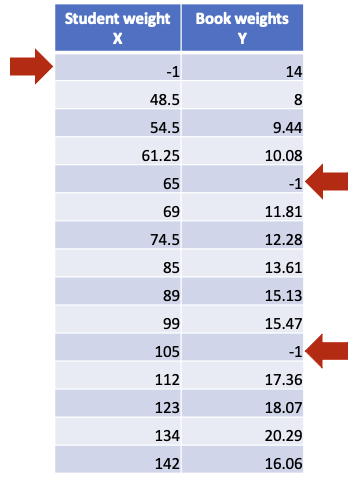

## Student and book weights with missing values
#### -1 is the placeholder for missing weights.

In [ ]:
dirty_student = [48.50, 54.50, 61.25, 65.00, 69.00, 74.50, 85.00,    -1, 89.00, 99.00, 105.00, 112.00, 123.00, 134.00, 142.00]
dirty_books   = [ 8.00,  9.44, 10.08,    -1, 11.81, 12.28, 13.61, 14.00, 15.13, 15.47,     -1, 17.36,  18.07,  20.29,  16.06 ]

## Load the `weights_dirty` table

In [ ]:
from data201 import db_connection, df_query

conn = db_connection(config_file = 'MissingWeights.ini')
cursor = conn.cursor()

In [ ]:
cursor.execute('DROP TABLE IF EXISTS dirty_weights')

sql = ( """
        CREATE TABLE dirty_weights
        (
            student DOUBLE NOT NULL,
            books   DOUBLE NOT NULL,
            PRIMARY KEY(student, books)
        )
        """
      )

cursor.execute(sql)

In [ ]:
dirty = list(zip(dirty_student, dirty_books))
dirty

In [ ]:
sql = ( """
        INSERT INTO dirty_weights
        VALUES (%s, %s)
        """
      )

cursor.executemany(sql, dirty)
conn.commit()

df_query(conn,
    """
    SELECT student AS student_weights,
           books AS book_weights
    FROM dirty_weights
    """
)

In [ ]:
cursor.close()
conn.close()